In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 17.1: Clustering using k-means

## Objectives

+ To demonstrate clustering using k-means

Let's start by generating a synthetic dataset using with three clusters.

In [2]:
# Fixing the random seed so that we all get the same data
np.random.seed(123456)
# Make synthetic dataset for clustering
num_clusters_true = 3
# The means of each cluster
mu_true = 3.0 * np.random.randn(num_clusters_true, 2)
# The variance of the observations around the cluster
sigma_true = 0.5
# How many observations to generate per cluster
num_obs_cluster = [50, 50, 50]
# Generate the data
data = []
for i in range(num_clusters_true):
    x_i = mu_true[i] + sigma_true * np.random.randn(num_obs_cluster[i], 2)
    data.append(x_i)
data = np.vstack(data)
# Permute the data so that order info is lost
data = np.random.permutation(data)

Now let's visualize the data forgetting about the underlying clusers that gave rise to them.

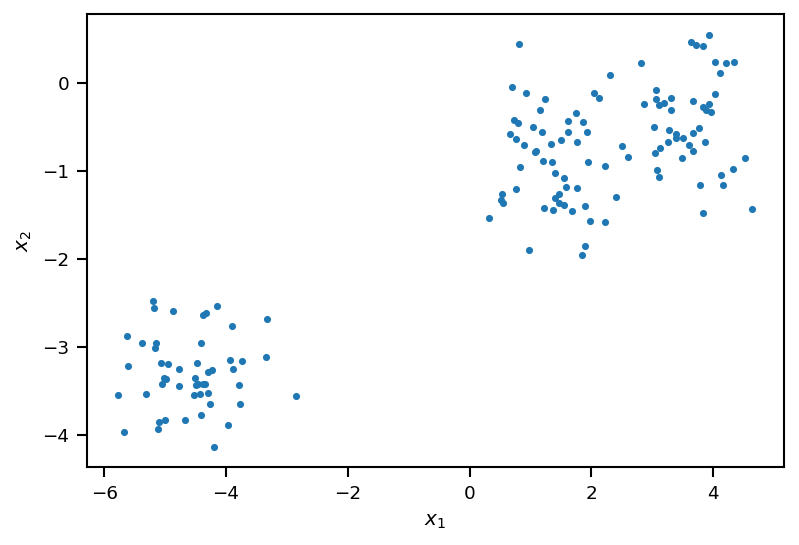

In [3]:
fig, ax = plt.subplots(dpi=150)
ax.plot(data[:, 0], data[:, 1], '.')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

We are not going to implement the K-means algorithm from scratch.
Instead, we are going to use the implementation that can be found in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
Here is how easy it is:

In [4]:
# Load the KMeans class:
from sklearn.cluster import KMeans

# Fit the model using the data:
model = KMeans(n_clusters=3).fit(data)

Here is how you can access the cluster centers (the $\mu_k$'s) from the trained model:

In [5]:
model.cluster_centers_

array([[ 3.6100492 , -0.44266908],
       [-4.57184776, -3.2974181 ],
       [ 1.39401475, -0.88957314]])

Compare the identified cluster centers to the actual cluster centers:

In [6]:
# Very close to the true ones
mu_true

array([[ 1.4073369 , -0.84859003],
       [-4.52717551, -3.40689711],
       [ 3.63633608, -0.51964395]])

K-means has also labeled each observation point with its cluster id.
Here is how to get this info:

In [7]:
# The clsuter of each point
model.labels_

array([2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0,
       1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2], dtype=int32)

Since we have 2D observations, we can actually visualize the clusters.
Here is a nice way to do this:

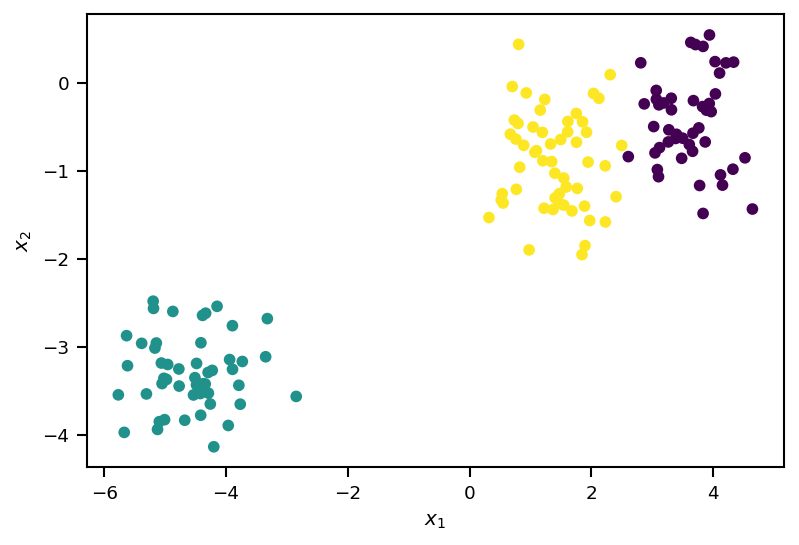

In [8]:
labels = model.predict(data)
fig, ax = plt.subplots(dpi=150)
plt.scatter(data[:, 0], data[:, 1], c=labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Okay, this seems to work perfectly.
However, notice that we asked K-means to find three clusters which happens to be the true number of clusters in our dataset.
What would happen if we had asked K-means to find a larger number of clusters, say 5?
Here it is:

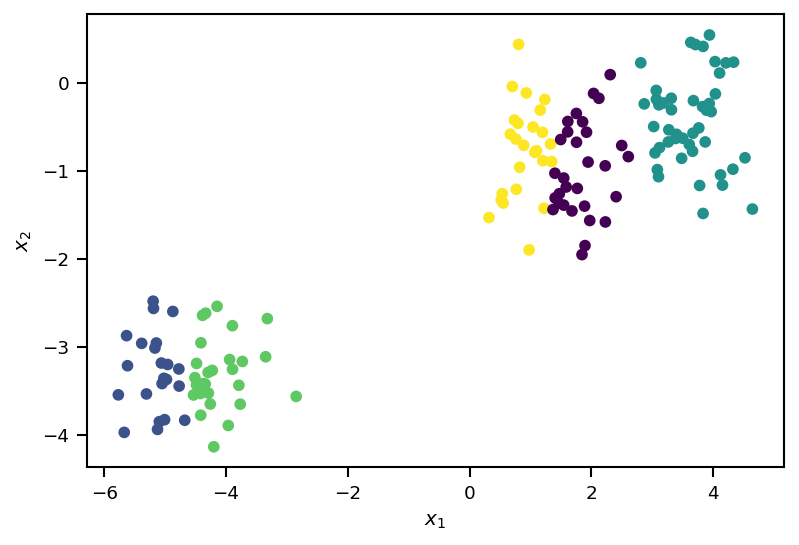

In [9]:
model5 = KMeans(n_clusters=5).fit(data)
labels = model5.predict(data)
fig, ax = plt.subplots(dpi=150)
plt.scatter(data[:, 0], data[:, 1], c=labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

### Questions
+ We saw what happens when you ask K-means to find more clusters than there actually exist. What would happen, if you asked it to find a smaller number of clusters? Try $K=1$ and $K=2$ in the code block immediatly above. What do you observe? Can choose between $K=1, 2,$ or $3$?
+ Rerun the entire example from the very first code block but this time set the number of true clusters to 6. Investigate what happens when you try to fit K-means with a very small number of clusters, what happens when you pick $K$ to be around 6, and what happens when you pick a very big $K$, say 10.